In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/drive/MyDrive/AAIC/incident_event_log.csv')
df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

Checking the Null values

In [112]:
df.isna().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

There are no NaN or null values to replace.

<h2> Goal in EDA </h2> 
    1. Which category tickets are taking longer time? <br>
    2. How many tickets have missed the SLA <br>
    3. How many tickets are closed in a day and how many in more than 3 days. (using IQR) <br>
    4. How many aged tickets are there and will they get good CSAT score? (CSAT score depeds on the recount number, age of the ticket, reassignement count)

In [113]:
df['made_sla'].value_counts()

#made_sla: boolean attribute that shows whether the incident missed the SLA or has time still.

True     111738
False      8260
Name: made_sla, dtype: int64

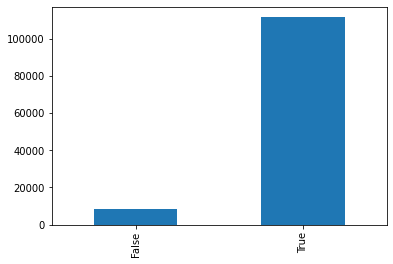

In [114]:
import seaborn as sns #IMPORTING The plotting library
import matplotlib as plt

df.made_sla.value_counts().sort_values().plot(kind = 'bar')

This is an imbalanced data so accuracy cannot be a metric. 
False negative is the metric here and it has to be as less as possible.

<h2> Univariate analysis </h2>

In [115]:
!pip install phik

In [116]:
df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [117]:
#df=df.drop(['number','sys_mod_count','caller_id','opened_by','sys_created_by','location'],axis=True)

In [118]:
import phik
from phik import resources, report
import matplotlib.pyplot as plt
df[:10]
df.corr(method="pearson")

,active,reassignment_count,reopen_count,sys_mod_count,made_sla,knowledge,u_priority_confirmation
active,1.000000,0.041379,0.017933,-0.097613,0.588877,0.045495,-0.473268
reassignment_count,0.041379,1.000000,0.171593,0.527626,-0.084169,0.075911,0.011176
reopen_count,0.017933,0.171593,1.000000,0.245033,-0.017170,0.010445,0.132294
sys_mod_count,-0.097613,0.527626,0.245033,1.000000,-0.235021,0.062952,0.194123
made_sla,0.588877,-0.084169,-0.017170,-0.235021,1.000000,-0.070748,-0.233724
knowledge,0.045495,0.075911,0.010445,0.062952,-0.070748,1.000000,-0.229277
u_priority_confirmation,-0.473268,0.011176,0.132294,0.194123,-0.233724,-0.229277,1.000000


In [119]:
df.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

Categorical data <br>
- incident_state
- caller_id
- opened_by 
- sys_created_by             
- sys_created_at 
- Contact_type
- location
- Category
- Subcategory
- impact
- urgency
- priority
- assignment_group
- assigned_to
- problem_id
- fc
- vendor


<br> The above data cannot be correlated

In [120]:
import phik
from phik import resources, report
import matplotlib.pyplot as plt
df[:10]
df.corr(method="pearson")

,active,reassignment_count,reopen_count,sys_mod_count,made_sla,knowledge,u_priority_confirmation
active,1.000000,0.041379,0.017933,-0.097613,0.588877,0.045495,-0.473268
reassignment_count,0.041379,1.000000,0.171593,0.527626,-0.084169,0.075911,0.011176
reopen_count,0.017933,0.171593,1.000000,0.245033,-0.017170,0.010445,0.132294
sys_mod_count,-0.097613,0.527626,0.245033,1.000000,-0.235021,0.062952,0.194123
made_sla,0.588877,-0.084169,-0.017170,-0.235021,1.000000,-0.070748,-0.233724
knowledge,0.045495,0.075911,0.010445,0.062952,-0.070748,1.000000,-0.229277
u_priority_confirmation,-0.473268,0.011176,0.132294,0.194123,-0.233724,-0.229277,1.000000


From the above, we can say that the above columns are corelated and not the others. 

Active variable has high corelation with made_sla.

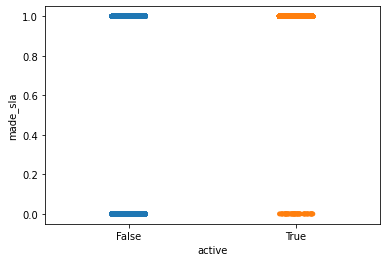

In [121]:
import seaborn as sns
sns.stripplot(x="active", y="made_sla",data=df)

From the above plot it is evident that, if the ticket is not active, SLA did not miss (0) otherwise if the active status is True, the SLA has missed.

In [122]:
df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [123]:
df['impact'].value_counts()

2 - Medium    113691
3 - Low         3418
1 - High        2889
Name: impact, dtype: int64

In [124]:
df['urgency'].value_counts()

2 - Medium    113550
1 - High        3303
3 - Low         3145
Name: urgency, dtype: int64

In [125]:
df['priority'].value_counts()

3 - Moderate    112115
4 - Low           3549
2 - High          2499
1 - Critical      1835
Name: priority, dtype: int64

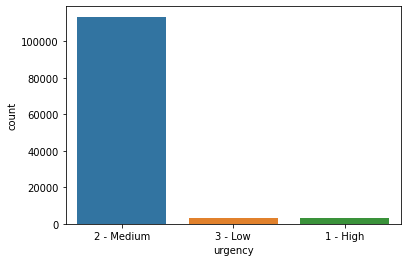

In [126]:
ax = sns.countplot(x="urgency", data=df)

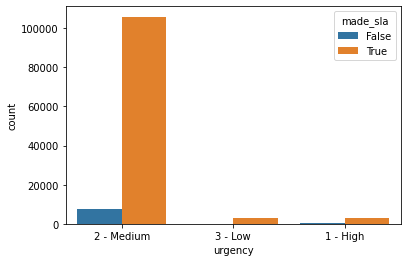

In [127]:
ax = sns.countplot(x="urgency",hue="made_sla",data=df)

From the above plots we can say that most of the tickets with low urgency have missed the SLAs and only a few tickets with Medium SLAs have saved the SLA to get the exact count we define it as below - 

In [128]:
df_made_sla=df[df['made_sla']==True]

#True indicates the SLA misses

In [129]:
len(df[df['urgency']=="3 - Low"])

3145

We have 3145 tickets with Low urgency

In [130]:
len(df_made_sla[df['urgency']=="3 - Low"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


3037

Out of all the 3145 tickets available 3037 tickets have missed the SLA with low urgency.

In [131]:
df_made_sla=df[df['made_sla']==True]

#True indicates the SLA misses

In [132]:
len(df[df['urgency']=="1 - High"])

3303

In [133]:
len(df_made_sla[df['urgency']=="1 - High"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


2873

Out of all the 3303 tickets with high urgency 2873 tickets have breached the SLA which is not accepted and need to take some action accordingly.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


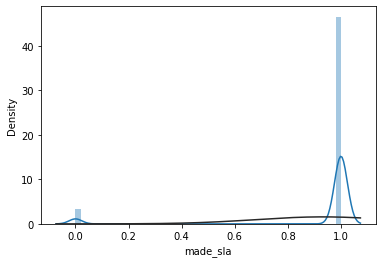

In [134]:
from scipy.stats import norm
sns.distplot(df['made_sla'], fit = norm)

The data that we have is completely skewed

Bivariate Analysis

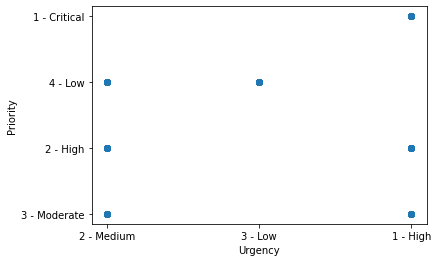

In [135]:
plt.scatter(df.urgency,df.priority)
plt.xlabel("Urgency")
plt.ylabel("Priority")
plt.show()

It is know that priority is an automated field that gets affected by Urgency and impact fiels. Above is the plot of Urgency Vs Prority

Correlation plot goes as below -

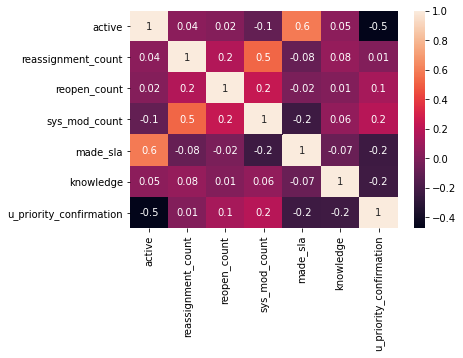

In [136]:
sns.heatmap(df.corr(), annot = True, fmt='.1g')

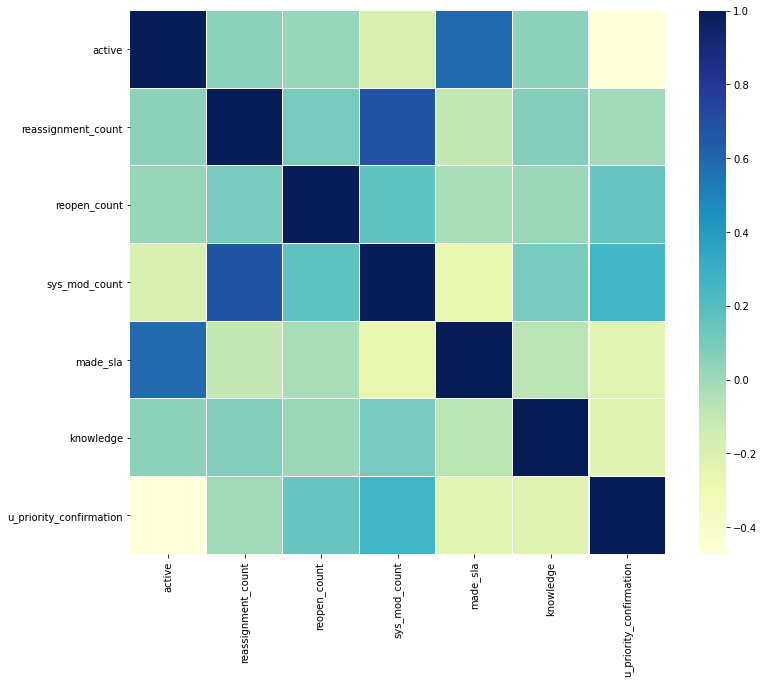

In [137]:
corrmat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [138]:
df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [139]:
df.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

<h2> Feature Engineering </h2>

Categorical varoiables

Categorical - <br>
- Incident_state
- caller_id
- opened_by
- caller_id                 
- opened_by                  
- opened_at                  
- sys_created_by             
- sys_created_at             
- sys_updated_by             
- sys_updated_at             
- contact_type               
- location                   
- category                   
- subcategory                
- u_symptom                  
- cmdb_ci                    
- impact                     
- urgency                    
- priority                   
- assignment_group           
- assigned_to                
- notify                     
- problem_id                 
- rfc                         
- vendor                      
- caused_by                    
- closed_code                   
- resolved_by                   
- resolved_at                   
- closed_at                     


<h4> Out of all the categorical variables we would only need the below for further analysis on SLA.</h4> <br>

*   Incident_state
*   contact_type
*   location  
*   category 
*   subcategory   
*   assignment_group
*   assigned_to



Train and test split

In [140]:
y=df['made_sla']
X=df.drop(['made_sla'],axis=1)
print(y.shape)
print(X.shape)

(119998,)
(119998, 35)


In [141]:
from sklearn.model_selection import train_test_split
#Split the data between train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80398, 35)
(80398,)
(39600, 35)
(39600,)


<H3> One Hot encoding on categorical data </H3>


*   Incident_state
*   contact_type
*   location  
*   category 
*   subcategory   
*   assignment_group
*   assigned_to


In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import Normalizer

le = LabelEncoder()

#Incident_state
le.fit(X_train['incident_state'])
X_train_incident_state_norm = le.transform(X_train['incident_state'])
X_test_incident_state_norm = le.transform(X_test['incident_state'])

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import Normalizer

le = LabelEncoder()

#contact_type
le.fit(X_train['contact_type'])
X_train_contact_type_norm = le.transform(X_train['contact_type'])
X_test_contact_type_norm = le.transform(X_test['contact_type'])

In [145]:
le = LabelEncoder()

#location

le.fit(pd.concat([X_train['location'], X_test['location']], axis=0, sort=False))
X_train_location_norm = le.transform(X_train['location'])
X_test_location_norm = le.transform(X_test['location'])

In [146]:
le = LabelEncoder()
#category
le.fit(pd.concat([X_train['category'], X_test['category']], axis=0, sort=False))
#X_train_category_norm = le.transform(X_train['category'])
X_test_category_norm = le.transform(X_test['category'])

In [147]:
le = LabelEncoder()

#subcategory
#le.fit(X_train['subcategory'])
#http://kagglesolutions.com/r/feature-engineering--label-encoding

le.fit(pd.concat([X_train['subcategory'], X_test['subcategory']], axis=0, sort=False))

X_train_subcategory_norm = le.transform(X_train['subcategory'])
X_test_subcategory_norm = le.transform(X_test['subcategory'])

In [148]:
#assignment_group

#le.fit(X_train['assignment_group'])

le.fit(pd.concat([X_train['assignment_group'], X_test['assignment_group']], axis=0, sort=False))

X_train_assignment_group_norm = le.transform(X_train['assignment_group'])
X_test_assignment_group_norm = le.transform(X_test['assignment_group'])

In [149]:
#assigned_to

#le.fit(X_train['assigned_to'])

le.fit(pd.concat([X_train['assigned_to'], X_test['assigned_to']], axis=0, sort=False))

X_train_assigned_to_norm = le.transform(X_train['assigned_to'])
X_test_assigned_to_norm = le.transform(X_test['assigned_to'])

<h4> Create a new feature</h4>

<p> Age of the ticket </p>

Age of the ticket helps engineers to treat the ticket with priority so that they can save the SLA <br>

Age = df['opened_at']-df['resolved_at']

In [150]:
df['opened_at'].head(5)

0    29/2/2016 01:16
1    29/2/2016 01:16
2    29/2/2016 01:16
3    29/2/2016 01:16
4    29/2/2016 04:40
Name: opened_at, dtype: object

In [151]:
df['resolved_at'].head(5)

0    29/2/2016 11:29
1    29/2/2016 11:29
2    29/2/2016 11:29
3    29/2/2016 11:29
4     1/3/2016 09:52
Name: resolved_at, dtype: object

In [152]:
import datetime

#df['age']=(df['opened_at'].astype(float)-df['resolved_at'].astype(float))
#df['age']=df['age']/np.timedelta64(1,'D')

df['opened_at']=pd.to_datetime(df.opened_at)
#df['resolved_at']=pd.to_datetime(df.resolved_at)

df['opened_at'] = pd.to_datetime(df['opened_at']).dt.date
#new_time = dfs['XYF']['TimeUS'].astype(float)
#new_time_F = new_time / 1000000

df['opened_at']

0         2016-02-29
1         2016-02-29
2         2016-02-29
3         2016-02-29
4         2016-02-29
             ...    
119993    2016-05-13
119994    2016-05-13
119995    2016-05-13
119996    2016-05-13
119997    2016-05-13
Name: opened_at, Length: 119998, dtype: object

In [153]:
df['resolved_at']=df['resolved_at'].str[:-5]
df['resolved_at']

0         29/2/2016 
1         29/2/2016 
2         29/2/2016 
3         29/2/2016 
4          1/3/2016 
             ...    
119993    13/5/2016 
119994    13/5/2016 
119995              
119996              
119997    17/5/2016 
Name: resolved_at, Length: 119998, dtype: object

In [154]:
import datetime

#df['age']=(df['opened_at'].astype(float)-df['resolved_at'].astype(float))
#df['age']=df['age']/np.timedelta64(1,'D')

df['resolved_at']=pd.to_datetime(df.resolved_at)
#df['resolved_at']=pd.to_datetime(df.resolved_at)

df['resolved_at'] = pd.to_datetime(df['resolved_at']).dt.date
#new_time = dfs['XYF']['TimeUS'].astype(float)
#new_time_F = new_time / 1000000

df['resolved_at']

0         2016-02-29
1         2016-02-29
2         2016-02-29
3         2016-02-29
4         2016-01-03
             ...    
119993    2016-05-13
119994    2016-05-13
119995           NaT
119996           NaT
119997    2016-05-17
Name: resolved_at, Length: 119998, dtype: object

In [155]:
df['resolved_at'].fillna(0)

0         2016-02-29
1         2016-02-29
2         2016-02-29
3         2016-02-29
4         2016-01-03
             ...    
119993    2016-05-13
119994    2016-05-13
119995             0
119996             0
119997    2016-05-17
Name: resolved_at, Length: 119998, dtype: object

In [156]:
df['opened_at'].fillna(0)

0         2016-02-29
1         2016-02-29
2         2016-02-29
3         2016-02-29
4         2016-02-29
             ...    
119993    2016-05-13
119994    2016-05-13
119995    2016-05-13
119996    2016-05-13
119997    2016-05-13
Name: opened_at, Length: 119998, dtype: object

In [160]:
#df['age']=df['resolved_at']-df['opened_at']
df['resolved_at'].dtypes

dtype('O')

In [161]:
df['opened_at'].dtypes

dtype('O')

In [163]:
df['age']=df['resolved_at']-df['opened_at']
df['age']

0          0 days
1          0 days
2          0 days
3          0 days
4        -57 days
           ...   
119993     0 days
119994     0 days
119995        NaT
119996        NaT
119997     4 days
Name: age, Length: 119998, dtype: timedelta64[ns]

In [164]:
df['age'].value_counts()

0 days       32238
1 days        5668
31 days       3549
2 days        2973
30 days       2539
             ...  
266 days         4
-27 days         4
163 days         3
-182 days        3
-192 days        3
Name: age, Length: 492, dtype: int64

From the above, we can clearly say that there are outliers in the data as the resolved date cannot be younger than opened date. <br>
for ex. datapoint 4 says ticket was opened on 2016-02-29 (29th Feb) and resolved on 2016-01-03 (which is 3rd Jan) <br>


<H4>Encoding the numerical variables </H4>


*   impact
*   urgency
*   priority  
*   age


In [175]:
df['impact'].value_counts()

2 - Medium    113691
3 - Low         3418
1 - High        2889
Name: impact, dtype: int64